In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [81]:
ar = np.array([10,2.5,np.nan, None])
ar

array([10, 2.5, nan, None], dtype=object)

In [82]:
Se = pd.Series(ar)
Se

0      10
1     2.5
2     NaN
3    None
dtype: object

In [83]:
df = pd.DataFrame(Se)
df

0
0    10
1   2.5
2   NaN
3  None

In [84]:
df['Year'] = (1991,2015,2014,2003)

In [85]:
df['Height'] = [175,np.nan,125,np.nan]

In [86]:
df['Age'] = [27,5,6,15]

In [87]:
df['Weight']=[75,np.NAN,68,98]

In [88]:
df

0  Year  Height  Age  Weight
0    10  1991   175.0   27    75.0
1   2.5  2015     NaN    5     NaN
2   NaN  2014   125.0    6    68.0
3  None  2003     NaN   15    98.0

In [89]:
df.columns

Index([0, 'Year', 'Height', 'Age', 'Weight'], dtype='object')

In [90]:
df.drop(0,axis=1, inplace=True)

In [91]:
df

Year  Height  Age  Weight
0  1991   175.0   27    75.0
1  2015     NaN    5     NaN
2  2014   125.0    6    68.0
3  2003     NaN   15    98.0

In [92]:
df.dtypes

Year        int32
Height    float64
Age         int64
Weight    float64
dtype: object

c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


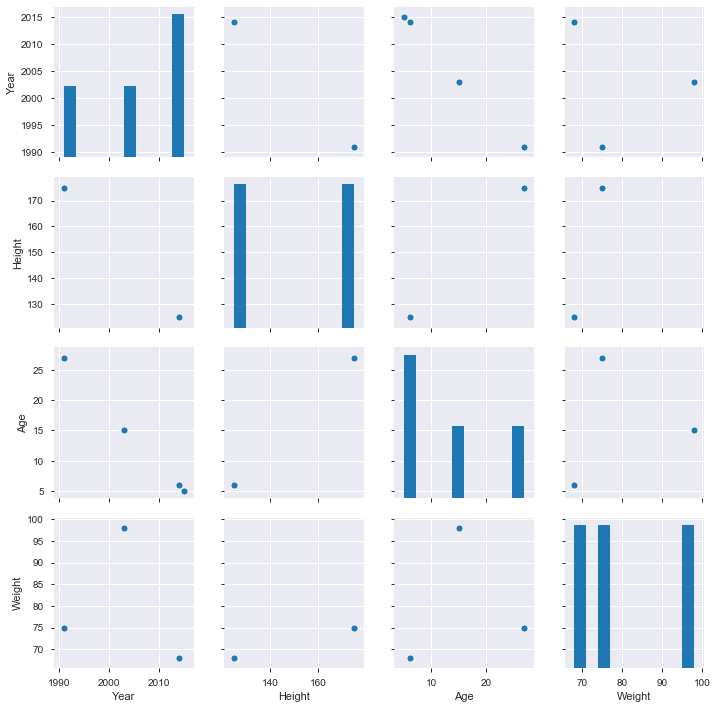

In [93]:
sns.pairplot(df)

In [94]:
np.nan_to_num(df)

array([[1991.,  175.,   27.,   75.],
       [2015.,    0.,    5.,    0.],
       [2014.,  125.,    6.,   68.],
       [2003.,    0.,   15.,   98.]])

In [95]:
np.nanargmax(df)

4

In [96]:
np.nanmean(df,axis=0)

array([2005.75      ,  150.        ,   13.25      ,   80.33333333])

In [97]:
np.nanmedian(df,axis=0)

array([2008.5,  150. ,   10.5,   75. ])

In [98]:
np.nanmin(df,axis=0)

array([1991.,  125.,    5.,   68.])

In [99]:
np.nanmax(df,axis=0)

array([2015.,  175.,   27.,   98.])

In [100]:
np.nancumprod(df,axis=0)

array([[1.99100000e+03, 1.75000000e+02, 2.70000000e+01, 7.50000000e+01],
       [4.01186500e+06, 1.75000000e+02, 1.35000000e+02, 7.50000000e+01],
       [8.07989611e+09, 2.18750000e+04, 8.10000000e+02, 5.10000000e+03],
       [1.61840319e+13, 2.18750000e+04, 1.21500000e+04, 4.99800000e+05]])

In [101]:
np.nancumsum(df,axis=0)

array([[1991.,  175.,   27.,   75.],
       [4006.,  175.,   32.,   75.],
       [6020.,  300.,   38.,  143.],
       [8023.,  300.,   53.,  241.]])

In [102]:
df.isna().sum()  # True=Nan

Year      0
Height    2
Age       0
Weight    1
dtype: int64

In [103]:
df.isnull().sum()

Year      0
Height    2
Age       0
Weight    1
dtype: int64

In [104]:
df.notna().sum() # Flase = Nan

Year      4
Height    2
Age       4
Weight    3
dtype: int64

In [105]:
df.notnull().sum()

Year      4
Height    2
Age       4
Weight    3
dtype: int64

In [106]:
df.mean()

Year      2005.750000
Height     150.000000
Age         13.250000
Weight      80.333333
dtype: float64

In [107]:
df['Height']=df['Height'].fillna(df['Height'].mean())

In [108]:
df

Year  Height  Age  Weight
0  1991   175.0   27    75.0
1  2015   150.0    5     NaN
2  2014   125.0    6    68.0
3  2003   150.0   15    98.0

In [115]:
df['Weight'].fillna(method='bfill')

0    75.0
1    68.0
2    68.0
3    98.0
Name: Weight, dtype: float64

In [118]:
df['Weight'].fillna(method='ffill',inplace=True)

In [119]:
df

Year  Height  Age  Weight
0  1991   175.0   27    75.0
1  2015   150.0    5    75.0
2  2014   125.0    6    68.0
3  2003   150.0   15    98.0

In [178]:
url = "https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/california_cities.csv"

In [180]:
df = pd.read_csv(url)
df.head()

Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  
1          20.260         20.184           0.076                0.37  
2          59.465         27.482          31.983               53.79  
3          14.155          4.632           9.524               67.28  
4          19.766         19.763           0.003                0.01

In [181]:
pandas_profiling.ProfileReport(df)

In [155]:
df.tail()

Unnamed: 0         city       latd       longd  elevation_m  \
477         477   Yountville  38.403056 -122.362222         30.0   
478         478        Yreka  41.726667 -122.637500        787.0   
479         479     YubaCity  39.134722 -121.626111         18.0   
480         480      Yucaipa  34.030278 -117.048611        798.0   
481         481  YuccaValley  34.133333 -116.416667       1027.0   

     elevation_ft  population_total  area_total_sq_mi  area_land_sq_mi  \
477          98.0              2933             1.531            1.531   
478        2582.0              7765            10.053            9.980   
479          59.0             64925            14.656           14.578   
480        2618.0             51367            27.893           27.888   
481        3369.0             20700            40.015           40.015   

     area_water_sq_mi  area_total_km2  area_land_km2  area_water_km2  \
477             0.000           3.966          3.966           0.000   
478             0.073          26.036         25.847           0.188   
479             0.078          37.959         37.758           0.201   
480             0.005          72.244         72.231           0.013   
481             0.000         103.639        103.639           0.000   

     area_water_percent  
477                0.00  
478                0.72  
479                0.53  
480                0.02  
481                0.00

In [156]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [157]:
df.head()

city       latd       longd  elevation_m  elevation_ft  \
0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2      Alameda  37.756111 -122.274444          NaN          33.0   
3       Albany  37.886944 -122.297778          NaN          43.0   
4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  
1          20.260         20.184           0.076                0.37  
2          59.465         27.482          31.983               53.79  
3          14.155          4.632           9.524               67.28  
4          19.766         19.763           0.003                0.01

In [158]:
df.tail()

city       latd       longd  elevation_m  elevation_ft  \
477   Yountville  38.403056 -122.362222         30.0          98.0   
478        Yreka  41.726667 -122.637500        787.0        2582.0   
479     YubaCity  39.134722 -121.626111         18.0          59.0   
480      Yucaipa  34.030278 -117.048611        798.0        2618.0   
481  YuccaValley  34.133333 -116.416667       1027.0        3369.0   

     population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
477              2933             1.531            1.531             0.000   
478              7765            10.053            9.980             0.073   
479             64925            14.656           14.578             0.078   
480             51367            27.893           27.888             0.005   
481             20700            40.015           40.015             0.000   

     area_total_km2  area_land_km2  area_water_km2  area_water_percent  
477           3.966          3.966           0.000                0.00  
478          26.036         25.847           0.188                0.72  
479          37.959         37.758           0.201                0.53  
480          72.244         72.231           0.013                0.02  
481         103.639        103.639           0.000                0.00

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 49.1+ KB


In [160]:
df.describe().T

count          mean            std         min  \
latd                482.0     36.095088       2.298006   32.578333   
longd               482.0   -119.837714       2.147676 -124.263333   
elevation_m         434.0    180.416705     309.531825  -34.000000   
elevation_ft        470.0    567.168723    1001.265722 -180.000000   
population_total    482.0  64894.933610  203204.096676    1.000000   
area_total_sq_mi    480.0     18.442183      36.363230    0.314000   
area_land_sq_mi     482.0     16.840981      32.694647    0.314000   
area_water_sq_mi    481.0      1.589630       9.490386    0.000000   
area_total_km2      477.0     46.753283      90.972269    0.813000   
area_land_km2       478.0     43.547021      84.933022    0.813000   
area_water_km2      478.0      3.125178      11.562269    0.000000   
area_water_percent  477.0      5.301801      14.656428    0.000000   

                             25%           50%           75%           max  
latd                   33.977292     36.204722     37.886667  4.196500e+01  
longd                -121.954931   -119.708611   -117.977292 -1.145964e+02  
elevation_m            22.000000     67.000000    173.500000  2.402000e+03  
elevation_ft           69.000000    200.000000    515.000000  7.880000e+03  
population_total    10902.000000  29057.500000  66466.500000  3.884307e+06  
area_total_sq_mi        3.708250      9.093000     19.878250  5.030000e+02  
area_land_sq_mi         3.506500      8.362000     19.090000  4.690000e+02  
area_water_sq_mi        0.000000      0.029000      0.244000  1.850200e+02  
area_total_km2          9.551000     23.551000     51.772000  1.302000e+03  
area_land_km2           9.025000     21.533000     49.322000  1.214000e+03  
area_water_km2          0.000250      0.078500      0.623250  1.222700e+02  
area_water_percent      0.000000      0.340000      1.870000  8.458000e+01

c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


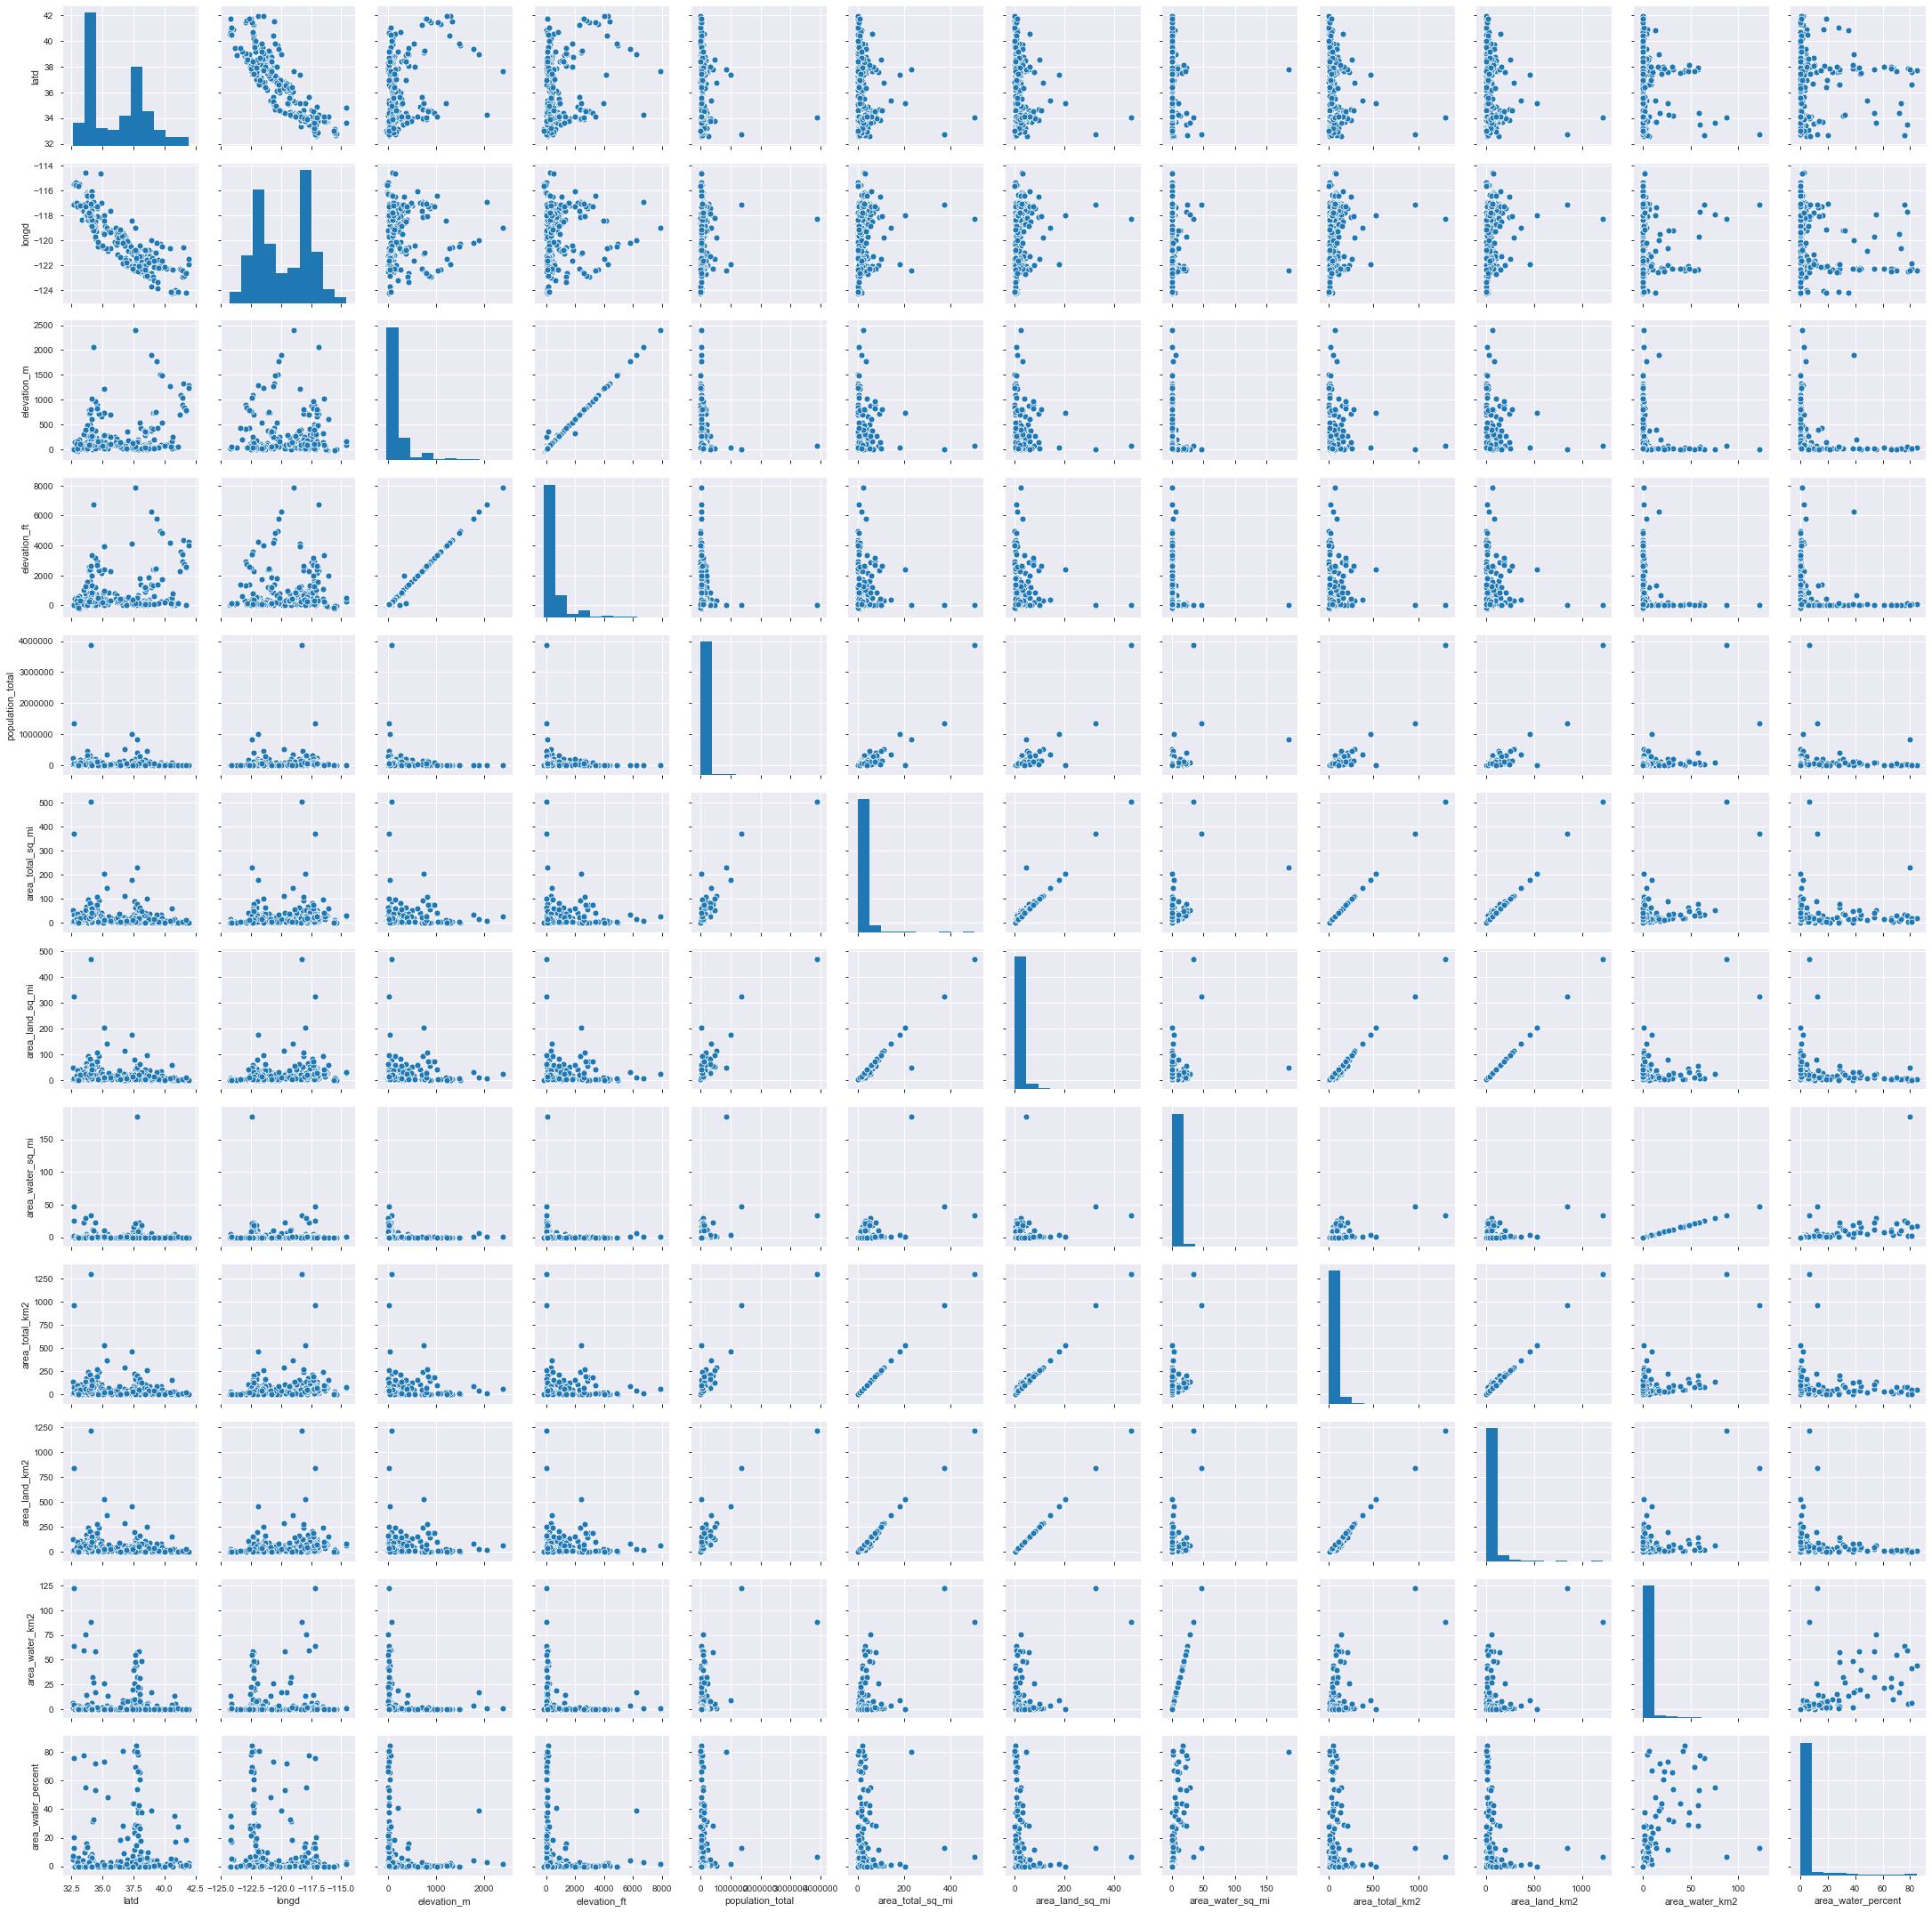

In [161]:
sns.pairplot(df)

In [162]:
df.isna().sum()

city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [163]:
Mean_value = df['elevation_m'].mean()
Mean_value

180.41670506912445

In [164]:
df['elevation_m'].fillna(Mean_value,inplace=True)

In [165]:
df.isna().sum()

city                   0
latd                   0
longd                  0
elevation_m            0
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [174]:
for i in df.columns[1:]:
    fill = np.nanmean(df[i])
    df[i].replace(np.nan,fill,inplace=True)
df

city       latd       longd  elevation_m  elevation_ft  \
0       Adelanto  34.576111 -117.432778   875.000000        2871.0   
1    AgouraHills  34.153333 -118.761667   281.000000         922.0   
2        Alameda  37.756111 -122.274444   180.416705          33.0   
3         Albany  37.886944 -122.297778   180.416705          43.0   
4       Alhambra  34.081944 -118.135000   150.000000         492.0   
..           ...        ...         ...          ...           ...   
477   Yountville  38.403056 -122.362222    30.000000          98.0   
478        Yreka  41.726667 -122.637500   787.000000        2582.0   
479     YubaCity  39.134722 -121.626111    18.000000          59.0   
480      Yucaipa  34.030278 -117.048611   798.000000        2618.0   
481  YuccaValley  34.133333 -116.416667  1027.000000        3369.0   

     population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0               31765            56.027           56.009             0.018   
1               20330             7.822            7.793             0.029   
2               75467            22.960           10.611            12.349   
3               18969             5.465            1.788             3.677   
4               83089             7.632            7.631             0.001   
..                ...               ...              ...               ...   
477              2933             1.531            1.531             0.000   
478              7765            10.053            9.980             0.073   
479             64925            14.656           14.578             0.078   
480             51367            27.893           27.888             0.005   
481             20700            40.015           40.015             0.000   

     area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0           145.107        145.062           0.046                0.03  
1            20.260         20.184           0.076                0.37  
2            59.465         27.482          31.983               53.79  
3            14.155          4.632           9.524               67.28  
4            19.766         19.763           0.003                0.01  
..              ...            ...             ...                 ...  
477           3.966          3.966           0.000                0.00  
478          26.036         25.847           0.188                0.72  
479          37.959         37.758           0.201                0.53  
480          72.244         72.231           0.013                0.02  
481         103.639        103.639           0.000                0.00  

[482 rows x 13 columns]

In [175]:
df.isna().sum()

city                  0
latd                  0
longd                 0
elevation_m           0
elevation_ft          0
population_total      0
area_total_sq_mi      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
dtype: int64

In [176]:
df

city       latd       longd  elevation_m  elevation_ft  \
0       Adelanto  34.576111 -117.432778   875.000000        2871.0   
1    AgouraHills  34.153333 -118.761667   281.000000         922.0   
2        Alameda  37.756111 -122.274444   180.416705          33.0   
3         Albany  37.886944 -122.297778   180.416705          43.0   
4       Alhambra  34.081944 -118.135000   150.000000         492.0   
..           ...        ...         ...          ...           ...   
477   Yountville  38.403056 -122.362222    30.000000          98.0   
478        Yreka  41.726667 -122.637500   787.000000        2582.0   
479     YubaCity  39.134722 -121.626111    18.000000          59.0   
480      Yucaipa  34.030278 -117.048611   798.000000        2618.0   
481  YuccaValley  34.133333 -116.416667  1027.000000        3369.0   

     population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0               31765            56.027           56.009             0.018   
1               20330             7.822            7.793             0.029   
2               75467            22.960           10.611            12.349   
3               18969             5.465            1.788             3.677   
4               83089             7.632            7.631             0.001   
..                ...               ...              ...               ...   
477              2933             1.531            1.531             0.000   
478              7765            10.053            9.980             0.073   
479             64925            14.656           14.578             0.078   
480             51367            27.893           27.888             0.005   
481             20700            40.015           40.015             0.000   

     area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0           145.107        145.062           0.046                0.03  
1            20.260         20.184           0.076                0.37  
2            59.465         27.482          31.983               53.79  
3            14.155          4.632           9.524               67.28  
4            19.766         19.763           0.003                0.01  
..              ...            ...             ...                 ...  
477           3.966          3.966           0.000                0.00  
478          26.036         25.847           0.188                0.72  
479          37.959         37.758           0.201                0.53  
480          72.244         72.231           0.013                0.02  
481         103.639        103.639           0.000                0.00  

[482 rows x 13 columns]

In [177]:
pandas_profiling.ProfileReport(df)

In [184]:
df['city'].isna().sum()

0

In [191]:
df['city'][0] = np.nan

In [193]:
df['city'].isna().sum()

1

In [232]:
df= pd.DataFrame({'Age':[24,55,65,84,75,45],
                 "Gender":['M','F',np.nan,'F','F','F'],
                 "Height":[175,134,154,156,172,180],
                 "Weight":(75,85,65,70,80, None),
                 "Data":[np.nan,4,np.nan,np.nan,np.nan,np.nan]
                 })
df

Age Gender  Height  Weight  Data
0   24      M     175    75.0   NaN
1   55      F     134    85.0   4.0
2   65    NaN     154    65.0   NaN
3   84      F     156    70.0   NaN
4   75      F     172    80.0   NaN
5   45      F     180     NaN   NaN

In [238]:
df.dropna()

Age Gender  Height  Weight  Data
1   55      F     134    85.0   4.0

In [245]:
df.dropna(axis='rows')

Age Gender  Height  Weight  Data
1   55      F     134    85.0   4.0

In [247]:
df.dropna(axis=0)

Age Gender  Height  Weight  Data
1   55      F     134    85.0   4.0

In [244]:
df.dropna(axis='index')

Age Gender  Height  Weight  Data
1   55      F     134    85.0   4.0

In [248]:
df.dropna(axis='columns')

Age  Height
0   24     175
1   55     134
2   65     154
3   84     156
4   75     172
5   45     180

In [250]:
df.dropna(axis=1)

Age  Height
0   24     175
1   55     134
2   65     154
3   84     156
4   75     172
5   45     180

In [256]:
df.dropna(axis='rows',how='all')

Age Gender  Height  Weight  Data
0   24      M     175    75.0   NaN
1   55      F     134    85.0   4.0
2   65    NaN     154    65.0   NaN
3   84      F     156    70.0   NaN
4   75      F     172    80.0   NaN
5   45      F     180     NaN   NaN

In [253]:
df.dropna(axis='columns',how='any')

Age  Height
0   24     175
1   55     134
2   65     154
3   84     156
4   75     172
5   45     180

In [265]:
df.dropna(thresh=4,axis='index') # how many Non null values are there

Age Gender  Height  Weight  Data
0   24      M     175    75.0   NaN
1   55      F     134    85.0   4.0
3   84      F     156    70.0   NaN
4   75      F     172    80.0   NaN

In [221]:
df['Data'].dropna(axis=0)

1    4.0
Name: Data, dtype: float64

In [228]:
df['Data'].dropna(axis=0,inplace=True)

In [230]:
Data = df.copy()

In [231]:
Data

Age Gender  Height  Weight  Data
0   24      M     175    75.0   NaN
1   55      F     134    85.0   4.0
2   65    NaN     154    65.0   NaN
3   84      F     156    70.0   NaN
4   75      F     172    80.0   NaN
5   45      F     180     NaN   NaN

In [236]:
Data['X']=4

In [237]:
Data

Age Gender  Height  Weight  Data  X
0   24      M     175    75.0   NaN  4
1   55      F     134    85.0   4.0  4
2   65    NaN     154    65.0   NaN  4
3   84      F     156    70.0   NaN  4
4   75      F     172    80.0   NaN  4
5   45      F     180     NaN   NaN  4